# 비지도학습 (Unsupervised Learning)

- 차원 축소
- 군집화(Clustering)


<br>

## 차원 축소

차원 축소
- feature가 많을수록 데이터의 차원이 커지게 되는데, 데이터셋의 크기에 비해 feature가 많아질 경우 이를 표현하기 위한 변수가 많아져 모델의 복잡성이 증가되고 과적합 문제가 발생되기도 한다.
- 이러한 문제를 해결하기 위해 차원 축소 방법이 사용되고 있다.
- 용어: 차원이란? 데이터 포인트를 공간에 표현하기 위해 필요한 최소한의 축의 개수

PCA(Principal Component Analysis)
- 차원 축소 기법 중 대표적인 기법
- 고차원에서 저차원으로 축소하는 선형 투영 기법
- 데이터의 차원이 증가할 수록 거리가 증가하고, 오버피팅 가능성이 커짐

PCA 단계
- 데이터에서 분산이 최대인 축을 찾음 (첫번째 축)
- 첫번째 축과 직교하면서 분산이 최대인 축을 찾음 (두번째 축)
- 첫번째와 두번째 축에 직교하고, 분산이 최대인 축을 찾음 (세번째 축)

In [1]:
# 라이브러리 불러오기
import pandas as pd

In [2]:
# 와인 데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [3]:
# 데이터 샘플 확인
print(data.shape)
data.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### 스케일링

- 특성별로 데이터 스케일이 다를 경우 머신러닝 모델이 원활하게 작동하는 데 어려움을 겪을 수 있어 데이터 스케일링을 통해 데이터 값의 범위나 분포를 같게 만들어줘야 한다.
- 스탠다드 스케일링은 데이터 스케일링의 한 종류로서 데이터가 표준 정규 분포를 갖도록 스케일링한다. (평균 0, 분산 1로 변경하여 모든 특성들이 같은 스케일을 갖도록 한다.)

In [4]:
# 스탠다드 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [5]:
# 데이터 복사
df = data.copy()

<br>

### PCA

In [6]:
# 라이브러리 불러오기
from sklearn.decomposition import PCA

In [7]:
# PCA
pca = PCA(n_components=2)

In [8]:
# PCA 변환
df = pca.fit_transform(df)

In [9]:
# 데이터 크기 확인
df.shape

(178, 2)

In [10]:
# 샘플 데이터 확인
df[:3]

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ]])

<br>

### PCA (2차원) 시각화

In [11]:
# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt

In [12]:
# 데이터 프레임 변환
df = pd.DataFrame(df)
df.head()

,0,1
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


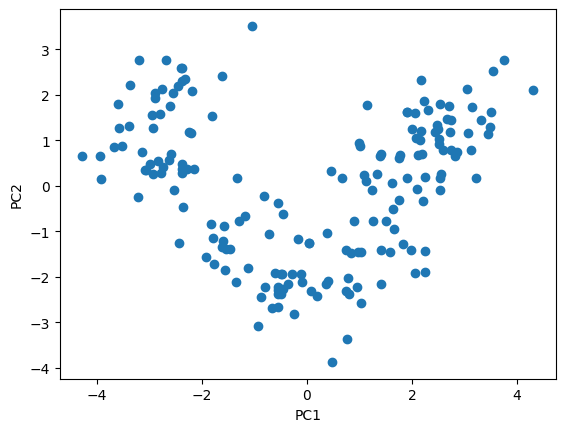

In [13]:
# scatter
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

PCA 결과의 부호가 예제와 부호 반전이지만 결국 분산(Explained Variance)은 동일하다.

- PCA는 데이터의 분산을 가장 잘 설명하는 직교 축(주성분)을 찾는 과정이다. 이때 축의 방향은 중요하지만, 양의 방향이든 음의 방향이든 동일한 주성분으로 간주된다.

- 즉, 벡터의 방향은 유지되되 +v나 -v는 PCA의 목적에서 동일한 정보를 제공한다.  두 벡터는 서로 방향만 반대일 뿐, 설명하는 분산 정보는 동일하다.

- Scikit-learn이나 다른 라이브러리에서 PCA를 구현할 때 내부적인 수치 계산이나 초기값 설정, 선형대수 라이브러리 버전 등에 따라 축의 부호가 달라질 수 있다.

분석 목적에서는 상대적인 위치 관계가 중요하므로 문제가 없다. 시각화를 위해 부호를 맞추고 싶을 때는 반전 처리할 수 있다.

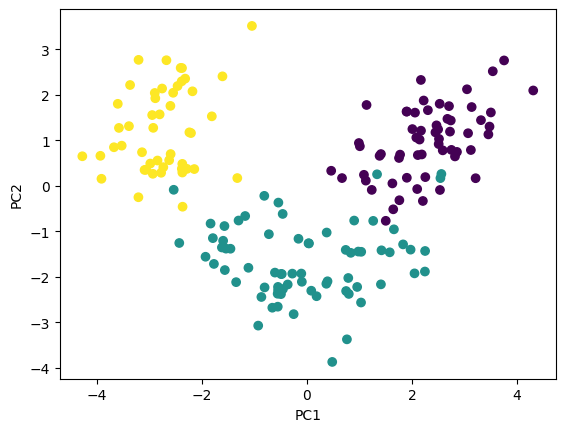

In [14]:
# scatter (c=target)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [15]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)  # PC1 PC2
print(pca.explained_variance_ratio_.sum())  # 설명력 합

[0.36198848 0.1920749 ]
0.5540633835693526


<br>

### PCA 전후 비교 (지도 학습)

In [16]:
# PCA 후 데이터로 머신러닝 (피처 2개)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
score = cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5)
print(score.mean())

0.9492063492063492


In [17]:
# PCA 전 데이터로 머신러닝 (피처 13개)
score = cross_val_score(model, data, dataset.target, scoring='accuracy', cv=5)
print(score.mean())

0.9553968253968254


<br>

### PCA (3차원) 시각화

In [18]:
# 새 데이터 복사
df = data.copy()

In [19]:
# PCA (n_components=4)
pca = PCA(n_components=3)

In [20]:
# PCA 변환
df = pca.fit_transform(df)

In [21]:
# 데이터 프레임 변환
df = pd.DataFrame(df)

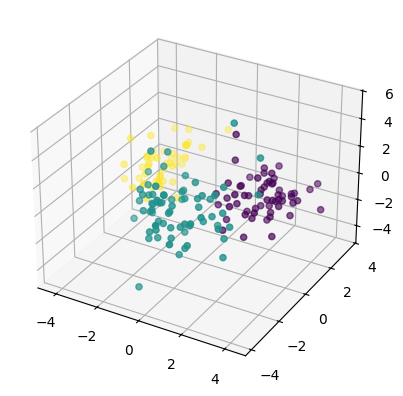

In [22]:
# 시각화 (3차원)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=dataset.target)
plt.show()

<br>

### 점진적 PCA

- 데이터셋이 큰 경우 활용 (배치를 통해 점진적 수행)

In [23]:
# 라이브러리 불러오기
from sklearn.decomposition import IncrementalPCA

In [24]:
# 데이터 복사
df = data.copy()

In [25]:
# 점진적 PCA
pca = IncrementalPCA(n_components=2, batch_size=16)

In [26]:
# 점진적 PCA 변환
df = pca.fit_transform(df)

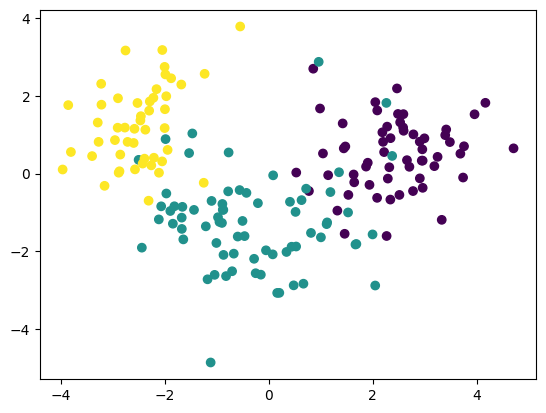

In [27]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target)
plt.show()

In [28]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.3400206  0.15239134]
0.4924119400154383


설명력이 조금 떨어지 것을 확인할 수 있다.  
매우 큰 데이터를 활용할 때는 굉장히 유용하게 작용할 수 있다.

<br>

### 희소 PCA

- 적절한 희소성을 유지 (alpha값으로 조정)
- 오버피팅 방지

In [29]:
# 라이브러리 불러오기
from sklearn.decomposition import SparsePCA

In [30]:
# 데이터 복사
df = data.copy()

In [31]:
# 희소 PCA
pca = SparsePCA(n_components=2, alpha=0.01)

In [32]:
# 희소 PCA 변환
df = pca.fit_transform(df)

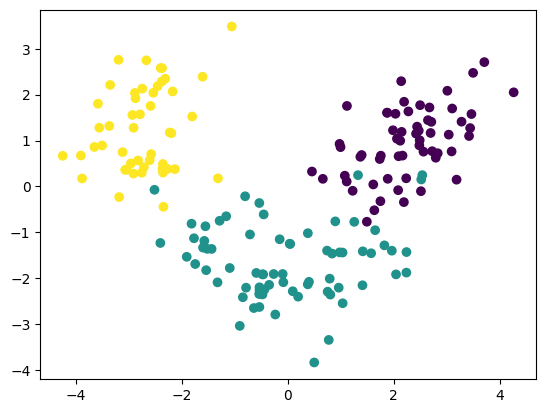

In [33]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target)
plt.show()

<br>

### 커널 PCA

- 비선형으로 차원 축소

In [34]:
# 라이브러리 불러오기
from sklearn.decomposition import KernelPCA

In [35]:
# 데이터 복사
df = data.copy()

In [36]:
# 커널 PCA
pca = KernelPCA(n_components=2)

In [37]:
# 커널 PCA 변환
df = pca.fit_transform(df)

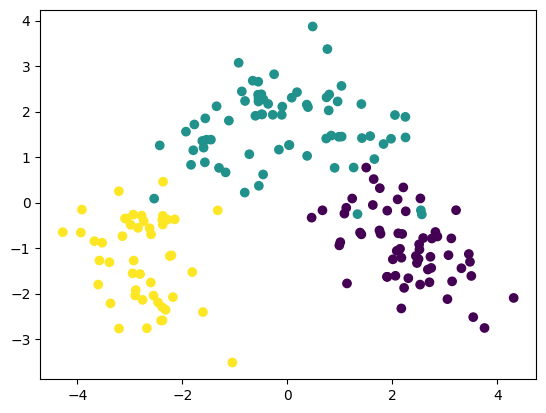

In [38]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target)
plt.show()

<br>

### SVD(Singular Value Decomposition) 특이값 분해

- 행렬을 특정한 구조로 분해하는 방식
- 신호 처리와 통계학 등의 분야에서 자주 사용됨

In [39]:
# 라이브러리 불러오기
from sklearn.decomposition import TruncatedSVD

In [40]:
# SVD 적용
df = data.copy()
pca = TruncatedSVD(n_components=2)
df = pca.fit_transform(df)

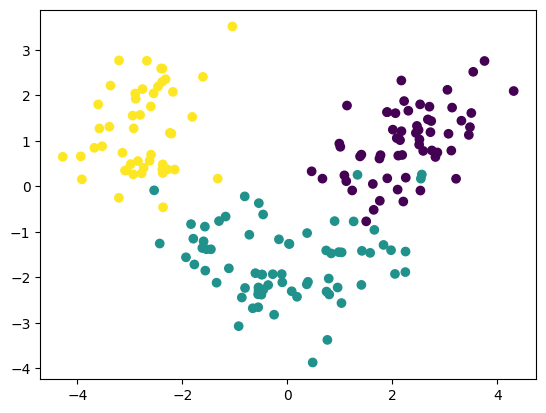

In [41]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target)
plt.show()

<br>
<br>

## Clustering

군집(Clustering)

- 군집분석은 유사성이 높은 대상의 집단을 분류하는 분석 방법
- 계층적 군집분석과 비계층적 군집분석 으로 구분함
    - 전통적인 계층적 군집분석은 군집의 개수를 나중에 선정함
    - 비계층적 군집분석인 K-means는 군집의 수를 가장 먼저 선정함
    - K-mean 군집분석은 초기 중심 값은 임의로 선정하며, 중심 값이 이동함

<br>

군집 분석의 평가 지표
- Silhouette(실루엣), Dunn Index 등 활용



<br>

### 비계층적 군집분석

- 대표적인 방법: K-means
- K-평균군집(centroid), 임의의 지점 K개를 선택해 해당 중심에서 가까운 데이터를 군집화 하는 기법
- n_clusters 하이퍼파라미터 반드시 설정


In [42]:
# KMeans 라이브러리
from sklearn.cluster import KMeans
import pandas as pd

In [49]:
# 데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

In [50]:
# KMeans 선언 및 학습
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [51]:
# KMeans 예측
pred = kmeans.predict(df)
pred

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int32)

In [53]:
# 실제값과 예측값 비교
#  - 이때 pred는 target값과 매칭되는 것이 아니라 단지 군집을 의미하는 것
df['target'] = dataset.target
df['pred'] = pred
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,2


<br>

1) PCA -> 군집 -> 시각화

In [54]:
# PCA
from sklearn.decomposition import PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
df.head()

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [55]:
# Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)
df['kmeans'] = pred
df

,0,1,kmeans
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,2
3,733.240139,0.192729,2
4,-11.571428,18.489995,1
...,...,...,...
173,-6.980211,-4.541137,1
174,3.131605,2.335191,1
175,88.458074,18.776285,1
176,93.456242,18.670819,1


In [56]:
# 각 군집의 중심점
centers = kmeans.cluster_centers_

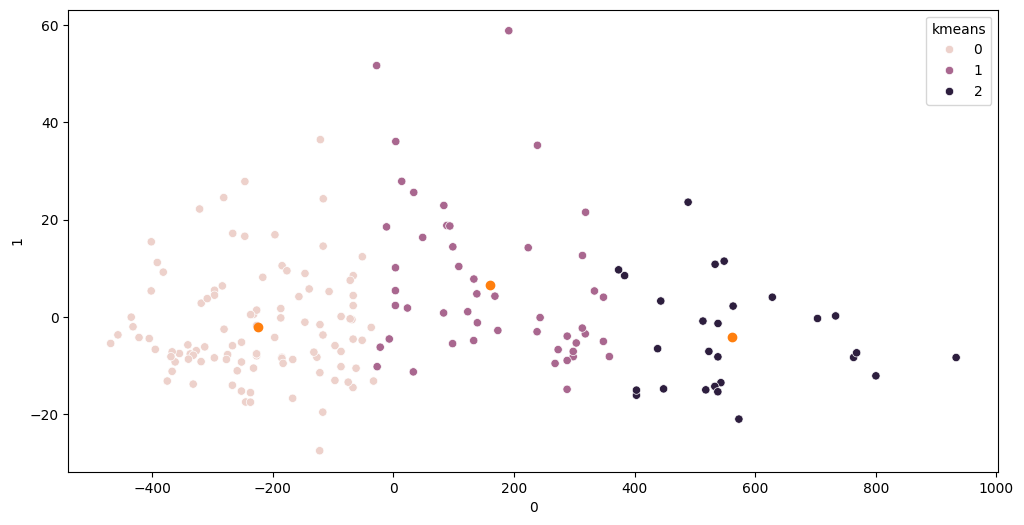

In [57]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df['kmeans'])
plt.scatter(centers[:,0], centers[:,1])

<br>

2) 클러스터 개수 찾는 방법 (엘보우 방법, elbow method)



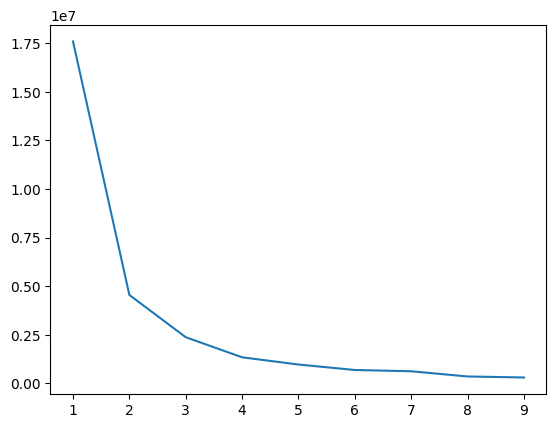

In [59]:
# 군집 수 찾기
inertia = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=2022)
    # 컬럼 이름을 모두 문자열로 변환
    df.columns = df.columns.astype(str)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia)

급격하게 감소하다가 완만해 지는 지점쯤을 선택하면 된다. (해당 예제에서는 2~4 사이에서 클러스터 지정)

<br>

### 계층적 군집분석

- 대표적인 방법: 덴드로그램
- K-means와 달리 군집 개수를 사전에 설정하지 않음

In [60]:
# 덴드로그램
from scipy.cluster.hierarchy import dendrogram, ward

<br>

1) PCA -> 타겟별 샘플링 -> 덴드로그램
- 덴드로그램: 개체간의 결합되는 순서를 나타낸 트리 형태의 다이어그램

In [61]:
# PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

In [64]:
# 샘플링 준비
dataset.target[:3]

array([0, 0, 0])

In [65]:
dataset.target[70:73]

array([1, 1, 1])

In [66]:
dataset.target[160:163]

array([2, 2, 2])

In [67]:
# 샘플링
kdata = df[:3].copy()
kdata = pd.concat([kdata, df[70:73]])
kdata = pd.concat([kdata, df[160:163]])
kdata

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
70,123.130138,1.059835
71,-337.104122,-7.623855
72,-275.096026,-7.753152
160,-227.068836,-7.618630
161,-66.755431,8.470290
162,-176.765098,9.473190


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [12.5, 12.5, 61.875, 61.875]],
 'dcoord': [[0.0,
   np.float64(30.991512411471586),
   np.float64(30.991512411471586),
   0.0],
  [0.0,
   np.float64(147.87787795984812),
   np.float64(147.87787795984812),
   np.float64(30.991512411471586)],
  [0.0, np.float64(48.02737852215064), np.float64(48.02737852215064), 0.0],
  [0.0,
   np.float64(88.07194000276085),
   np.float64(88.07194000276085),
   np.float64(48.02737852215064)],
  [0.0,
   np.float64(135.87135248973354),
   np.float64(135.87135248973354),
   np.float64(88.07194000276085)],
  [0.0, np.float64(190.03011431770938), np.float64(190.03011431770938), 0.0],
  [np.float64(135.87135248973354),
   np.float64(461.01587369114725),
   np.float64(461.01587369114725),
   np.float64(190.03011431770938)],
  [np.float64(147.8778779598481

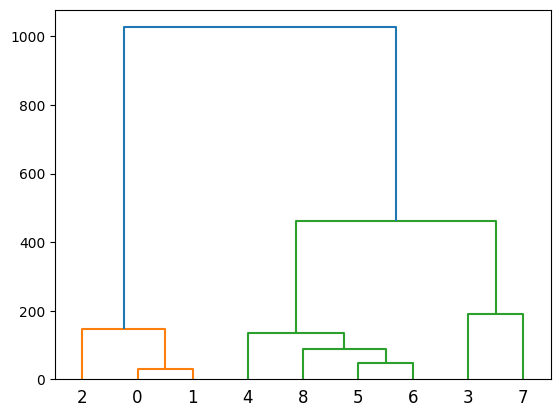

In [68]:
# 덴드로그램
linkage = ward(kdata)
dendrogram(linkage)